# Example of generating a Gaussian beam in spherical harmonics space

Generate $b_{lm}$ representation of a Gaussian beam

In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

Configure parameters of the transformation

In [2]:
lmax = 32
pol = True
nside = 64
beam_width = 10 * u.degree

## Generate the $b_{lm}$

The shape is $(1, \ell_{max})$ for temperature only, $(3, \ell_{max})$ for a polarized beam.

In [3]:
blm=hp.blm_gauss(beam_width.to_value(u.radian), lmax=lmax, pol=pol)

In [4]:
blm.shape

(3, 96)

## Plot

Plot the beam, rotate inside `mollview` for better visualization

In [5]:
m = hp.alm2map(blm, lmax=lmax, mmax=2 if pol else 0, nside=nside, pol=pol)

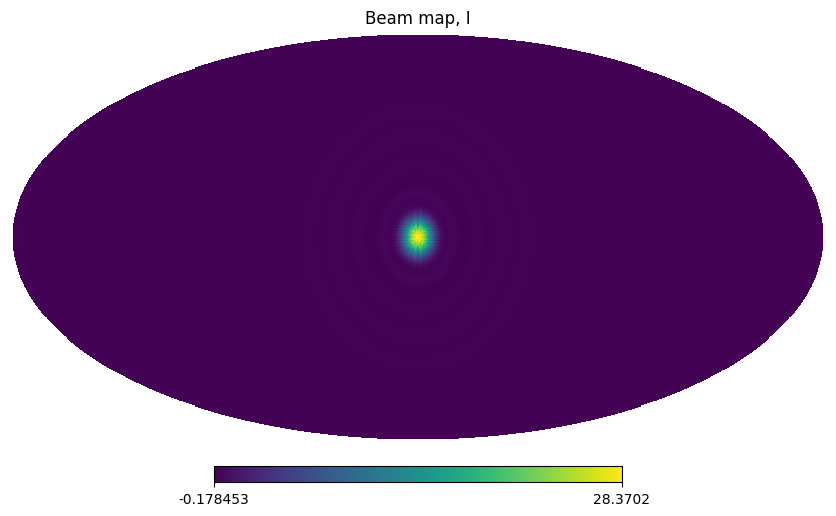

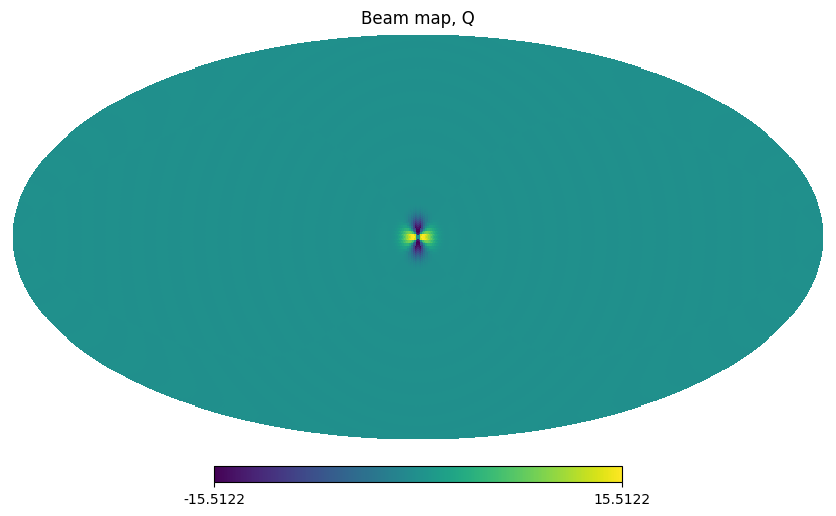

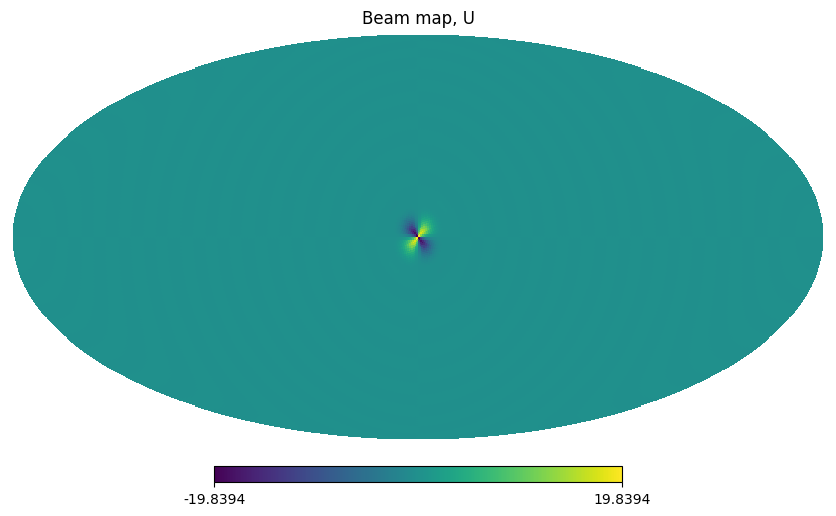

In [6]:
for each_m, label in zip(m, "IQU"):
    hp.mollview(each_m, rot=[0, 90], title=f"Beam map, {label}")

Para graficar el perfil radial del beam en $b_\ell$:


$b_\ell= \sqrt{\sum_m ∣b_{\ell m}∣^2 /(2\ell+1)}$



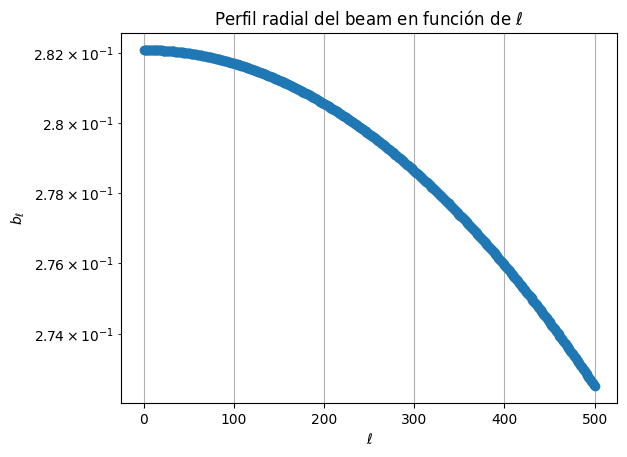

In [11]:
# Calcular el perfil radial promediando sobre m
b_l = np.array([
    np.sqrt(np.sum(np.abs(blm[:, ell:ell+1])**2) / (2*ell + 1))
    for ell in range(lmax + 1)
])

# Graficar el perfil del beam en función de l
plt.plot(np.arange(lmax + 1), b_l, marker="o", linestyle="-")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$b_{\ell}$")
plt.title("Perfil radial del beam en función de $\ell$")
plt.yscale("log")
plt.grid()
plt.show()